### **Used Libraries**

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Load Data**

**About Dataset**

The dataset provided contains information about students enrolled in an academic program. It composes of 200000 samples and 10 fields:

- Student ID: A unique identifier for each student in the dataset.
- Student Name: The name of the student.
- Date of Birth: The birth date of the student.
- Field of Study: The academic discipline or field that the student is pursuing.
- Year of Admission: The year in which the student was admitted to the program.
- Expected Year of Graduation: The anticipated year of graduation for the student.
- Current Semester: The current semester or term in which the student is enrolled.
- Specialization: The specific area of focus or specialization within the field of study.
- Fees: The total fees or tuition amount for the student.
- Discount on Fees: The amount of discount applied to the student's fees.

In [103]:
# Loading data into dataframe
data = pd.read_csv('student_data.csv', parse_dates=['Date of Birth'])

By specifying the parse_dates parameter and providing the column name with the date format, pandas will attempt to parse the dates correctly during the file reading process.

In [104]:
# Displaying first 5 rows
data.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


### **Explore Data**

Some fields (Student ID and Student Name) in the dataset are useless so far for the preprocessing and analysis phase, so it's handful to drop them off.

In [105]:
# Removing the Student ID and Student Name columns
data = data.drop(['Student ID', 'Student Name'],
            axis = 1)

# Verification step
data.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


### **Data Exploration**

In [106]:
# Checking dataset dimension (shape)
data.shape

(200000, 8)

According to the description from the previous section, it's confirmed that the dataset has ***200000*** observations and **10** features (fields). Remember, **2** features have already been removed, so in total there are **10** features.


In [107]:
# Returning all the datatypes used in the dataset
data.dtypes

Date of Birth                  datetime64[ns]
Field of Study                         object
Year of Admission                       int64
Expected Year of Graduation             int64
Current Semester                        int64
Specialization                         object
Fees                                    int64
Discount on Fees                        int64
dtype: object

The dataset, as it's mentioning, revolves around 2 types: **object** (qualitative or categorical values) and **int24** (quantitative or numerical values)

In [108]:
# Getting more statistical details
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of Admission,200000.0,2018.997685,2.002381,2016.0,2017.0,2019.0,2021.00,2022.0
Expected Year of Graduation,200000.0,2019.995235,1.997744,2017.0,2018.0,2020.0,2022.00,2023.0
Current Semester,200000.0,2.499020,1.117804,1.0,1.0,2.0,3.00,4.0
Fees,200000.0,125092.847595,43287.894903,50000.0,87641.5,125221.0,162597.25,200000.0
Discount on Fees,200000.0,12484.258575,8788.362629,0.0,5383.0,10792.5,18154.00,39865.0


The describe() method works only on numerical data. That's why, the dataframe shows only 5 rows

In [109]:
# Checking missing values
data.isna().sum()

Date of Birth                  0
Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
dtype: int64

Great!! No missing values found in any column. Let's check now the unique values for each categorical column

<Axes: >

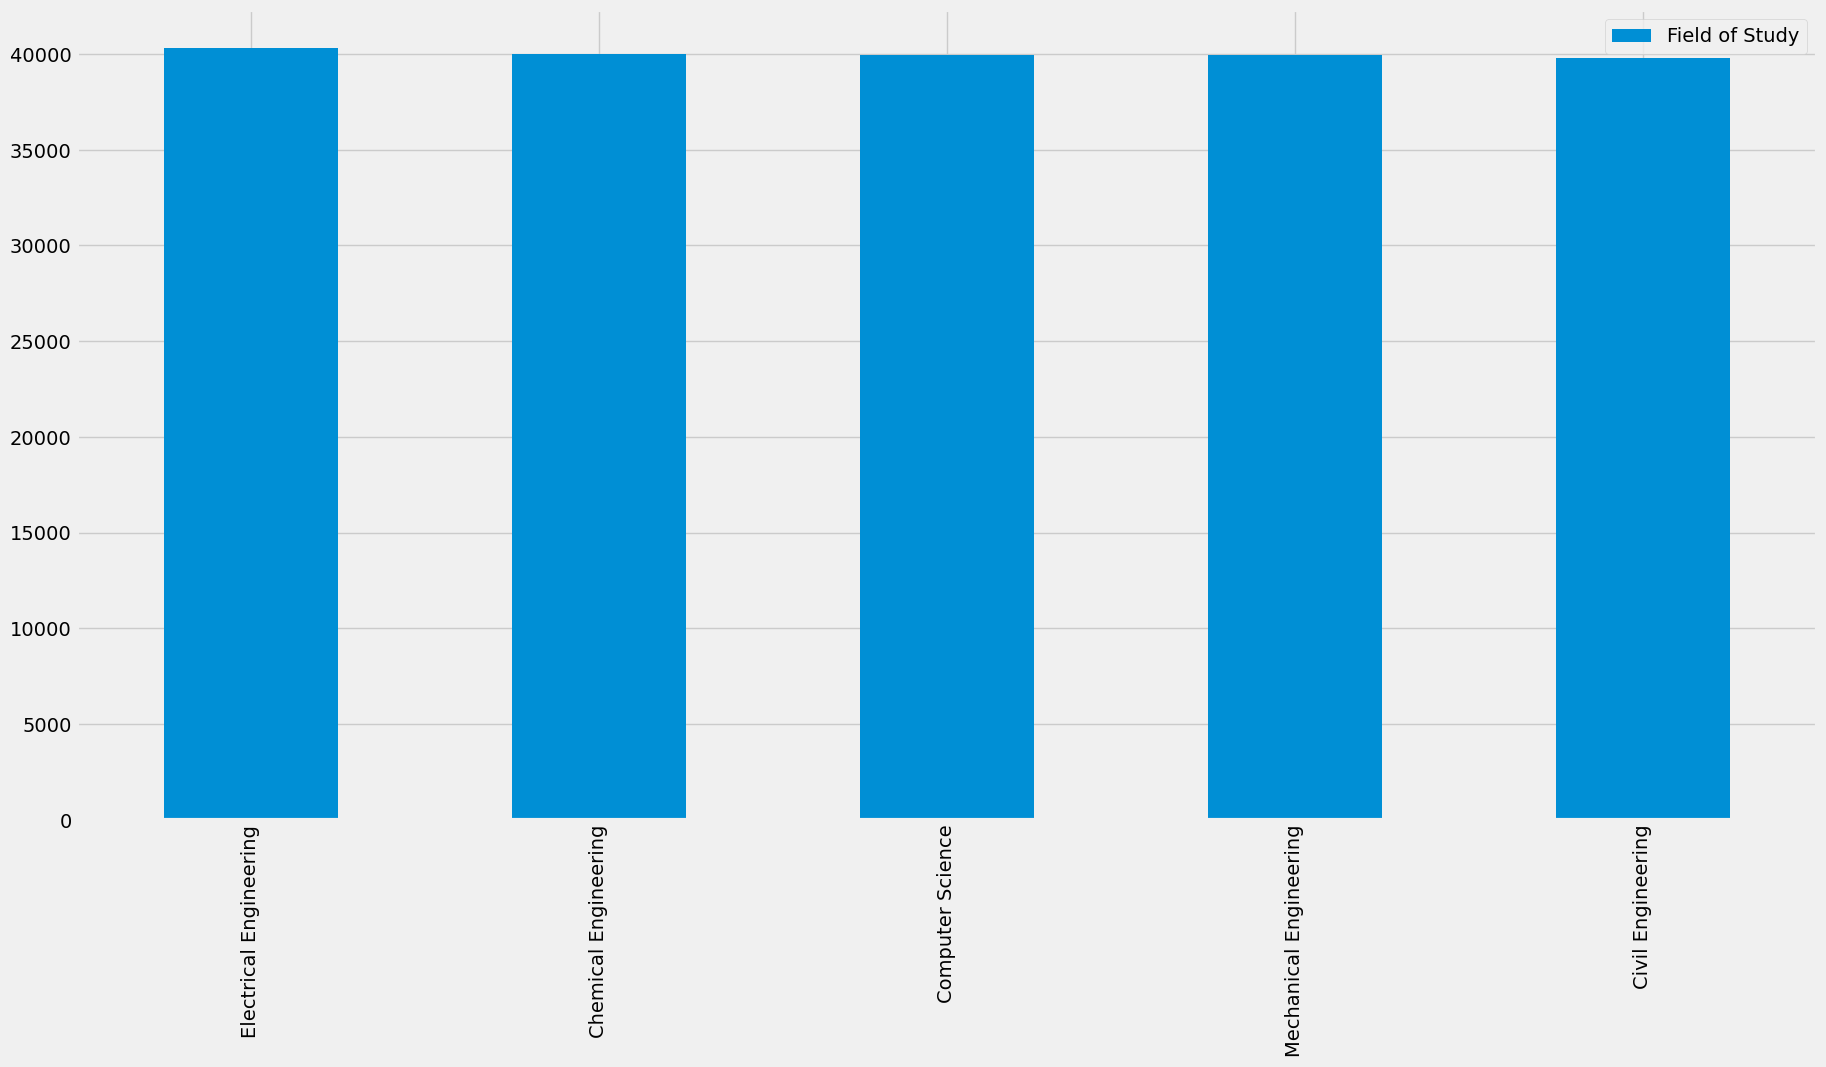

In [110]:
pd.DataFrame(data['Field of Study'].value_counts()).plot(kind='bar', figsize=(20,10))

In [111]:
field_of_study = data['Field of Study'].unique()
field_of_study

array(['Computer Science', 'Mechanical Engineering', 'Civil Engineering',
       'Chemical Engineering', 'Electrical Engineering'], dtype=object)

For the "Fied of Study" column, there are 5 unique values each one contains approximately 4000 samples:
- Computer Science
- Mechanical Engineering
- Civil Engineering
- Chemical Engineering
- Electrical Engineering

<Axes: >

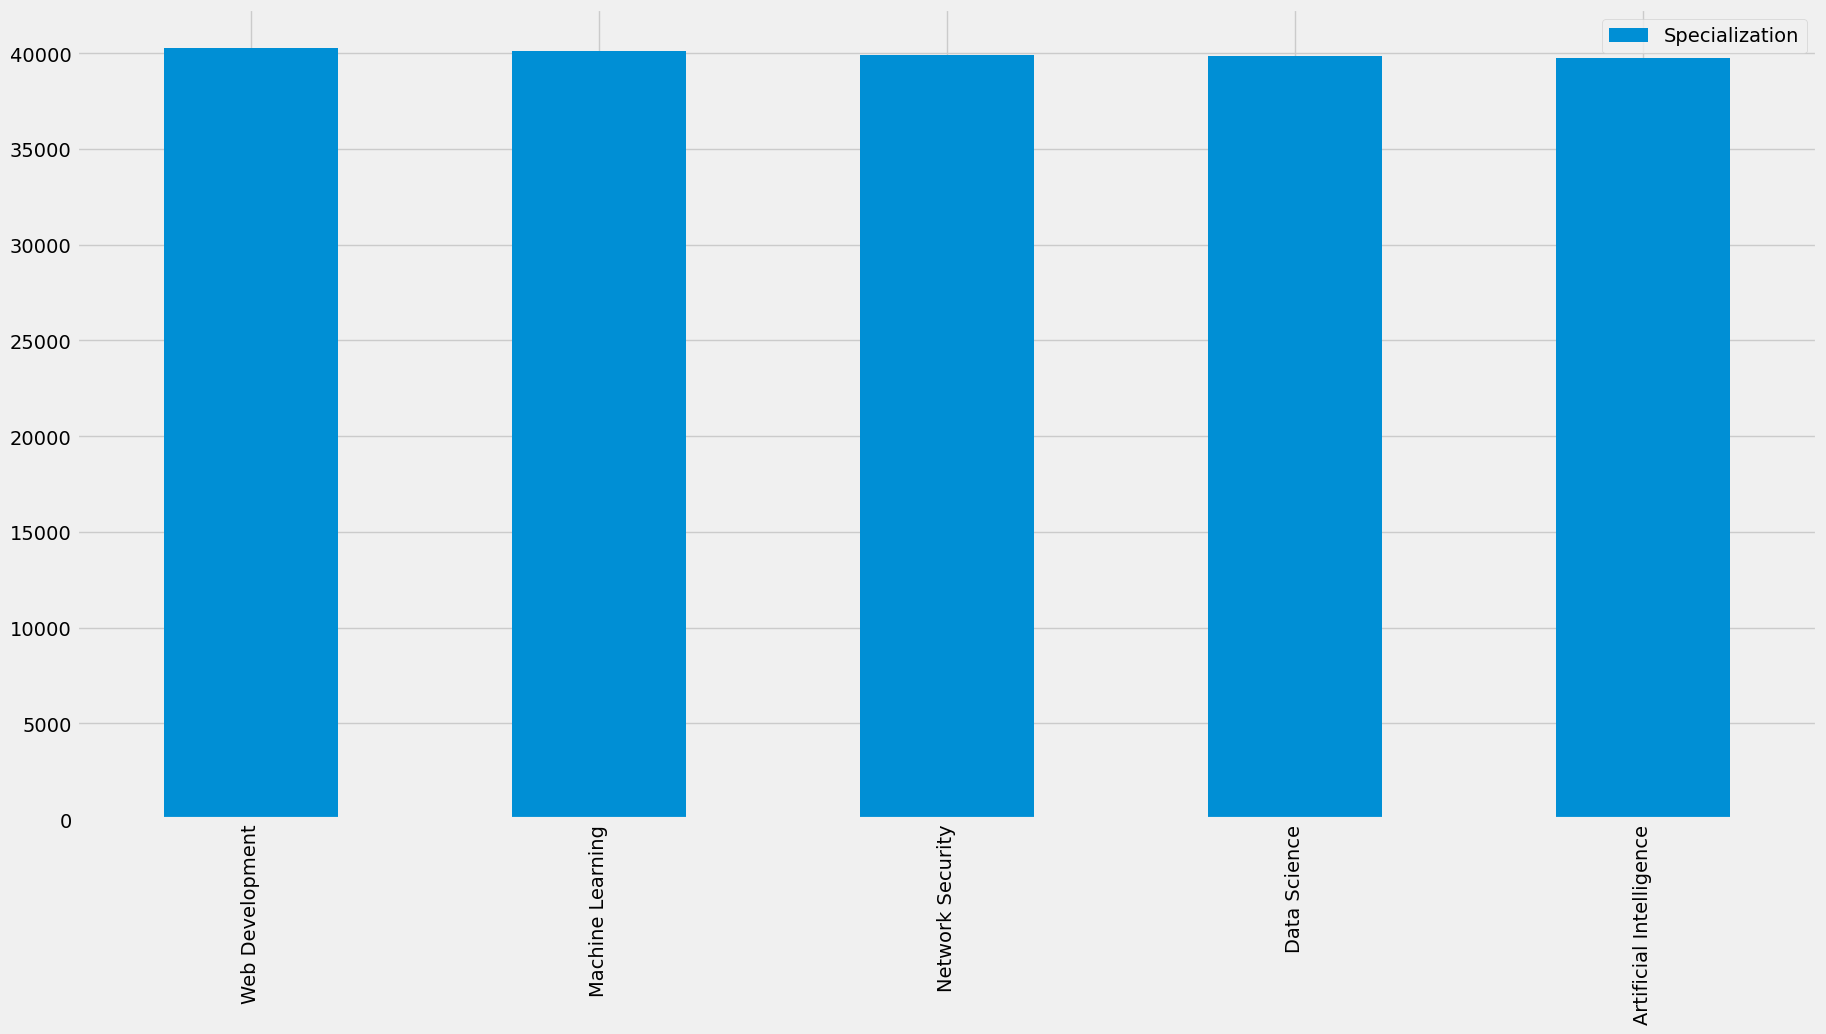

In [112]:
pd.DataFrame(data['Specialization'].value_counts()).plot(kind='bar', figsize=(20,10))

In [113]:
specialization = data['Specialization'].unique()
specialization

array(['Web Development', 'Machine Learning', 'Network Security',
       'Data Science', 'Artificial Intelligence'], dtype=object)

The "Specialization" column also consists of 5 unique values where the samples have been distributed equally:
- Web Development
- Machine Learning
- Network Security
- Data Science
- Artificial Intelligence

Before proceeding, let's dive deeper into some more analysis

>>> Number of Specializations for each Field:
 Field of Study
Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: Specialization, dtype: int64


<Axes: title={'center': 'Number of Specializations for each Field'}, xlabel='Field of Study', ylabel='Specialization'>

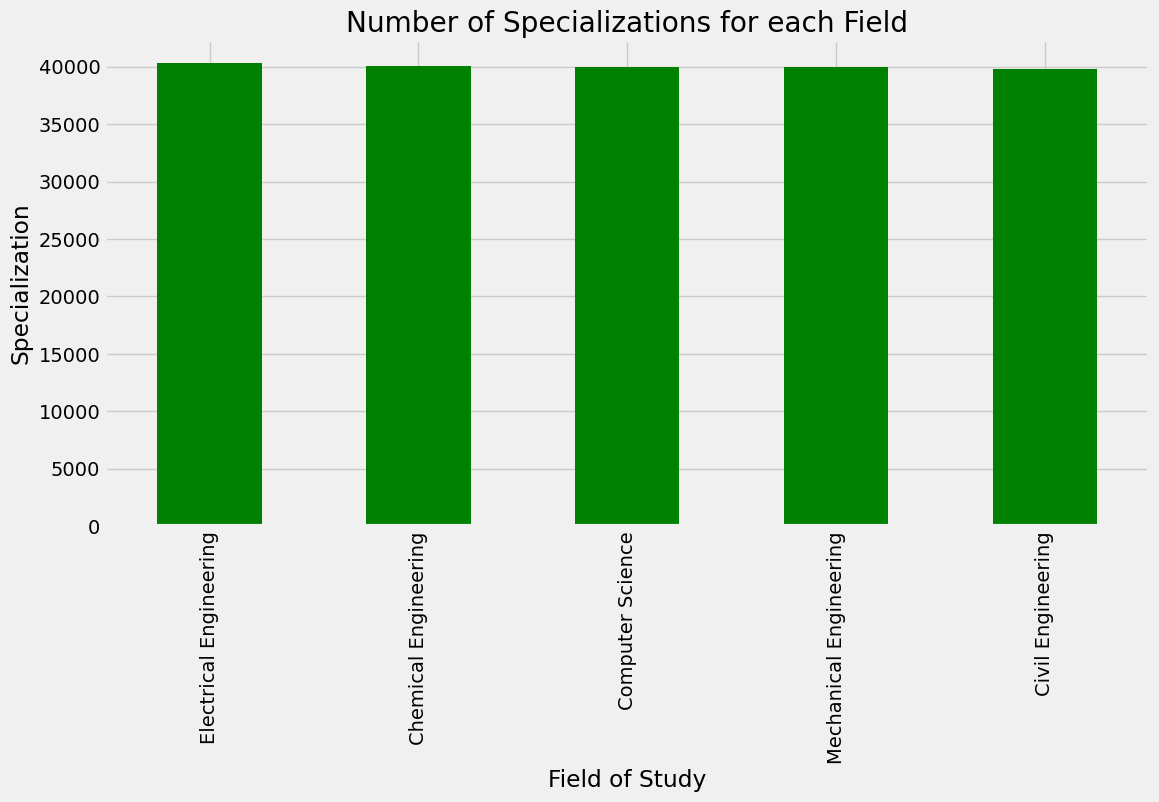

In [114]:
# How many specializations each field contains?

# Grouping the dataframe by each unique field according to the number of specializations each field has 
q = data.groupby(['Field of Study']).count()['Specialization'].sort_values(ascending=False).head()
print('>>> Number of Specializations for each Field:\n',q)
q.plot.bar(xlabel='Field of Study', ylabel='Specialization', color='green', figsize=(12,6),
                                    title='Number of Specializations for each Field')

<Figure size 1800x1200 with 0 Axes>

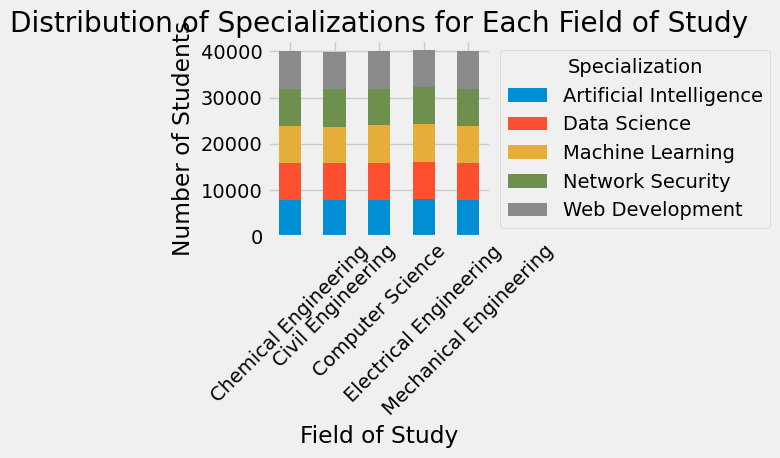

In [115]:
# Group the data by Field of Study and Specialization, and count the number of occurrences
grouped_data = data.groupby(["Field of Study", "Specialization"]).size().unstack()

# Create a stacked bar plot to visualize the specializations for each field of study
plt.figure(figsize=(18, 12))
grouped_data.plot(kind="bar", stacked=True)
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.title("Distribution of Specializations for Each Field of Study")
plt.xticks(rotation=45)
plt.legend(title="Specialization", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

The distribution of specializations for each field of study in the dataset appears to be relatively equal. By observing the plot, we can see that the bars within each field of study are generally of similar height, indicating a relatively balanced distribution of specializations. And this balance may help also in the splitting and prediction phase.

In [116]:
# Defining the function that returns the Years part from Date of Birth
def get_years(df):
    # Split the "Date of Birth" column by the delimiter "-"
    date_parts = df['Date of Birth'].astype(str).str.split('-')
    # Extract the year from the split parts
    return np.array([int(date[0]) for date in date_parts])

print(get_years(data))

[2006 1999 1997 ... 2000 2001 2005]


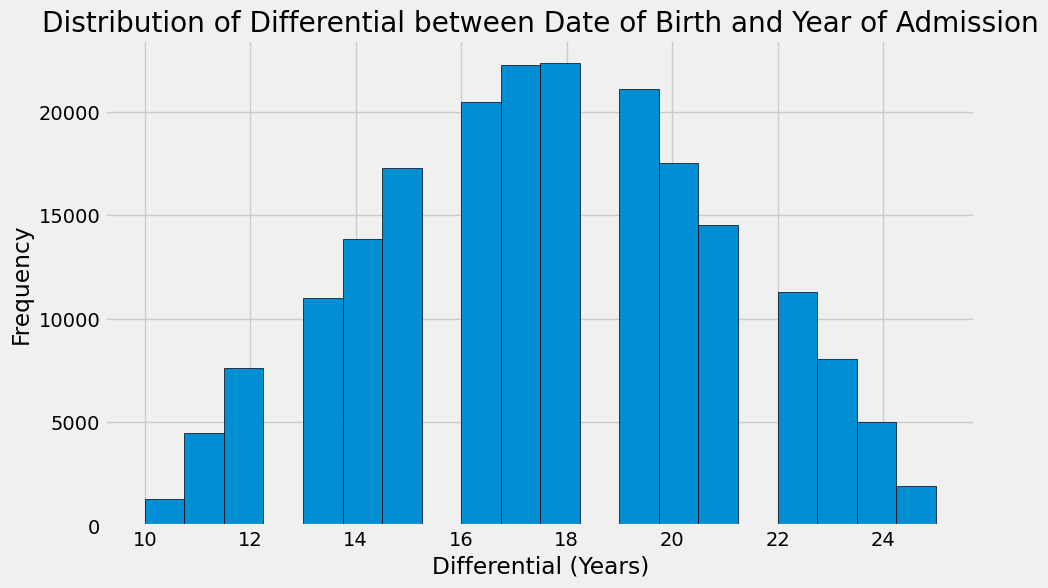

In [117]:
# Calculate the differential between Date of Birth and Year of Admission
data['Differential'] = data['Year of Admission'] - get_years(data) # It's mandatory to cast the datatype of Date of Birth

# Plot the histogram of the differentials
plt.figure(figsize=(10, 6))
plt.hist(data['Differential'], bins=20, edgecolor='black')
plt.xlabel("Differential (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Differential between Date of Birth and Year of Admission")
plt.show()

In [118]:
print('There are', data[data['Differential'] <= 16]['Differential'].count(), 'students who have attended colleges before the age of 17')

There are 75939 students who have attended colleges before the age of 17


The dataset reveals a discrepancy between the date of birth and the year of admission for some students, where the difference is unrealistically short, before 17 years at least. This suggests the presence of errors or inconsistencies in the data.

As correctly pointed out, it is not logically possible for a student to enter college after just 10+ years from their birth. This discrepancy could be attributed to data entry errors, misinterpretation, or any other data quality issues.

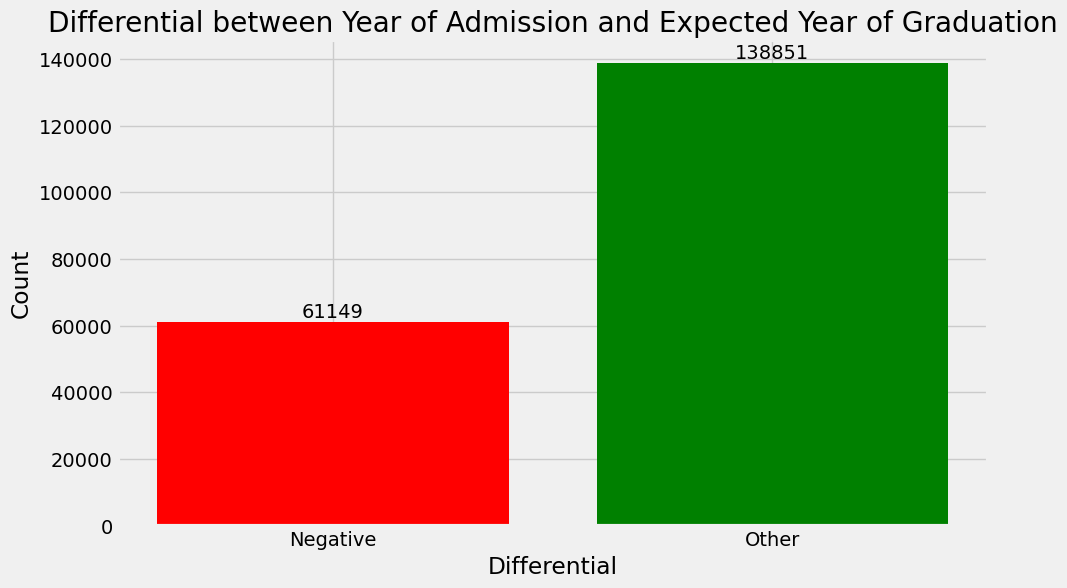

In [119]:
# Calculate the differential between Year of Admission and Expected Year of Graduation
data['Diff_adm_grad'] = data['Expected Year of Graduation'] - data['Year of Admission']

negative_diff = len(data[data['Diff_adm_grad'] < 0])
positive_diff = len(data[data['Diff_adm_grad'] >= 0])

# Plot the bar chart with red bars for negative differentials and green bars for other differentials
plt.figure(figsize=(10, 6))
plt.bar('Negative', negative_diff, color='red')
plt.bar('Other', positive_diff, color='green')
plt.xlabel('Differential')
plt.ylabel('Count')
plt.title('Differential between Year of Admission and Expected Year of Graduation')
plt.text('Negative', negative_diff, str(negative_diff), ha='center', va='bottom')
plt.text('Other', positive_diff, str(positive_diff), ha='center', va='bottom')
plt.show()

The visualization reveals also a significant issue with the dataset. The presence of a large number of students with a negative differential between their "Year of Admission" and "Expected Year of Graduation" is erroneous and indicates an inconsistency or error in the data.

A negative differential implies that the students are projected to complete their program before they even enter the college or university, which is logically impossible. This inconsistency may be a result of incorrect data entry, data corruption, or other data quality issues.

**Before moving on to cleaning step, let's verify whether the dataset represents some outliers or no.**

In [120]:
# Select columns with numerical data types
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[:-2]
# I eliminated 2 columns (The calculated differentials) because no need for them later
numerical_columns

Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Fees', 'Discount on Fees'],
      dtype='object')

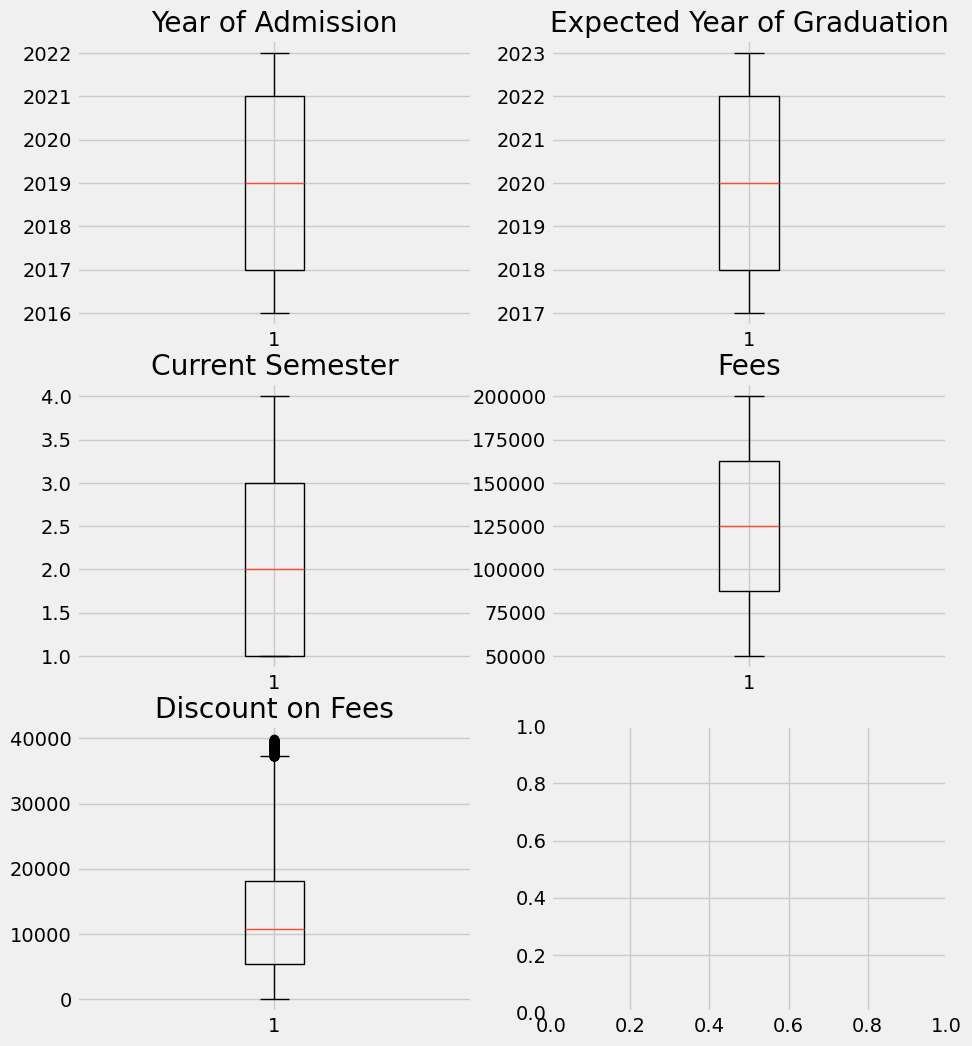

In [121]:
# Defining a function called "plot_boxplot" to plotting the outliers
#Boxplot is the suitable type of visualization for this purpose

def plot_boxplot(df, features):
    fig, ax = plt.subplots(3, 2, figsize=(10, 12))
    y_axis = 0
    x_axis = 0
    for x, ft in enumerate(features):
        ax[y_axis, x_axis].boxplot(x = ft, data = df)
        ax[y_axis, x_axis].set_title(ft)
        if x_axis == 1:
            y_axis += 1
        if x % 2 == 0:
            x_axis = 1
        else:
            x_axis = 0
plot_boxplot(df=data, features=numerical_columns)

It's obvious that only "Discount on Fees" contains outliers. Now, let's discover how many outliers exist in this feature

<Axes: xlabel='Discount on Fees'>

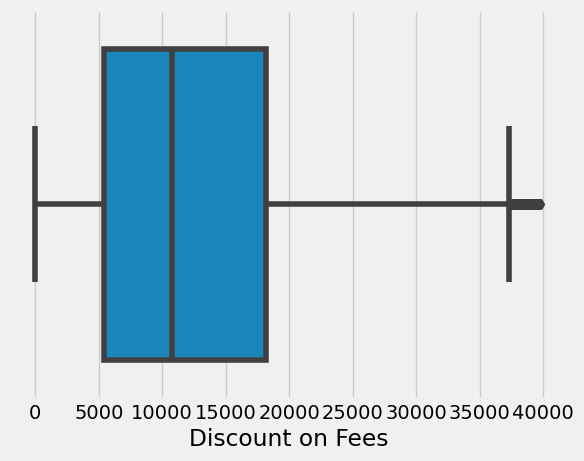

In [122]:
# Plotting particularly "Discount on Fees" using seaborn boxplot
sns.boxplot(x= 'Discount on Fees', data= data)

In [123]:

# Defining a function to get the output indices
def outliers(data, ft):
    # Calculate the IQR (Interquartile Range) for the column
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1

    # Define the outlier thresholds
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Return the indices of each outlier
    return data.index[(data[ft] < lower_threshold) | (data[ft] > upper_threshold)]

# Print the number of outliers
num_outliers = len(outliers(data, 'Discount on Fees'))
print('Number of outliers in Discount on Fees :', num_outliers)

Number of outliers in Discount on Fees : 615


### **Data Preprocessing (Cleaning)**

In order to process the dataset, several steps to prepare the data have to be followed. These steps include transforming categorical values into numerical representations, removing outliers, adjusting the differential calculation between the "Year of Admission" and "Expected Year of Graduation" for negative values, and removing samples with a differential age less than 16:

1. Transforming categorical values into numeric: As long as the dataset contains categorical variables, It's important to convert them into numerical representations that can be used for predictions later.

2. Removing outliers: Outliers are data points that deviate significantly from the majority of the dataset and can skew analysis results.

3. Adjusting negative differentials: In the dataset, the differential between the "Year of Admission" and "Expected Year of Graduation" may contain negative values due to inconsistencies or errors. To address this issue, we can switch the values between these two columns for the cases where the differential is negative.

4. Removing samples with a differential age less than 16: As part of the data validation process, it might be necessary to remove samples where the calculated differential age (in terms of years) is less than 16. This step helps filter out any erroneous or unrealistic entries where students are projected to complete their program at an extremely young age.

#### 1. Transforming categorical values into numeric

In [124]:
# Replace the Date of Birth values with just the Years portion
data['Date of Birth'] = get_years(data)
data['Date of Birth'].head()

0    2006
1    1999
2    1997
3    1999
4    1998
Name: Date of Birth, dtype: int32

Like Year of Admission and Expected Year of Graduation that have only the Years, it might be reasonable to do the same with Date of Birth.

In [125]:
# create a subset from the dataframe with just categorical variables
data_subset = data[['Field of Study', 'Specialization']]

# Instantiate the OrdinalEncoder class and put the categories for transformation
oe = OrdinalEncoder(categories=[list(field_of_study), list(specialization)])

In [126]:
# Fit with data
oe.fit(data_subset)

# Transform process
data_encoded = oe.transform(data_subset)

data[['Field of Study', 'Specialization']] = data_encoded
data.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Differential,Diff_adm_grad
0,2006,0.0,2020,2017,3,0.0,155152,19572,14,-3
1,1999,1.0,2020,2020,2,1.0,157870,14760,21,0
2,1997,2.0,2017,2022,1,2.0,55662,5871,20,5
3,1999,0.0,2021,2019,1,3.0,134955,17284,22,-2
4,1998,3.0,2016,2018,1,2.0,125934,14871,18,2


Great. The step went well.

#### 2. Removing outliers

In [127]:
# Define a function which returns a cleaned dataframe without outliers

def remove_outliers(df):
    # Get the indices of the outliers and sort them out
    indices = sorted(set(outliers(df, 'Discount on Fees')))

    # Drop the samples by indices
    df = df.drop(indices)

    return df

# Override the cleaned dataframe to the original one
data = remove_outliers(data)

data.shape

(199385, 10)

A new milestone has been hit!! Actually, the generated columns "Differential" and "Diff_adm_grad" have not been dropped yet, let's fulfill that as well.

In [128]:
# Drop "Differential" and "Diff_adm_grad" columns
data = data.drop(['Differential', 'Diff_adm_grad'], axis=1)

data.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,2006,0.0,2020,2017,3,0.0,155152,19572
1,1999,1.0,2020,2020,2,1.0,157870,14760
2,1997,2.0,2017,2022,1,2.0,55662,5871
3,1999,0.0,2021,2019,1,3.0,134955,17284
4,1998,3.0,2016,2018,1,2.0,125934,14871


#### 3. Adjusting negative differentials

In [129]:
# Define a function that switches 2 elements position in a list
def switch(ls):
    aux = ls[0]
    ls[0] = ls[1]
    ls[1] = aux

    return ls

In [130]:
# Store the values of the two columns in a variable of type array
diff = np.array(data[['Year of Admission', 'Expected Year of Graduation']])
diff

array([[2020, 2017],
       [2020, 2020],
       [2017, 2022],
       ...,
       [2022, 2023],
       [2017, 2018],
       [2018, 2020]], dtype=int64)

In [131]:
# Create a variable to store the output values
rectified_diff = []

# Check if the differential is negative and do the switching, otherwise no changes need to be made
for val in diff:
    if val[1] - val[0] < 0:
        rectified_diff.append(switch(val))
    else:
        rectified_diff.append(val)

# Override the rectified values onto the dataframe
data[['Year of Admission', 'Expected Year of Graduation']] = np.array(rectified_diff)

data.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,2006,0.0,2017,2020,3,0.0,155152,19572
1,1999,1.0,2020,2020,2,1.0,157870,14760
2,1997,2.0,2017,2022,1,2.0,55662,5871
3,1999,0.0,2019,2021,1,3.0,134955,17284
4,1998,3.0,2016,2018,1,2.0,125934,14871


#### 4. Removing samples with a differential age less than 16

In [132]:
data = data.drop(data[data['Year of Admission'] - data['Date of Birth'] < 16].index)
data.shape

(129508, 8)

After completing the preprocessing steps, the dataset has undergone several transformations. Categorical values have been converted into numerical representations using one-hot encoding, outliers have been removed from the dataset, the "Year of Admission" and "Expected Year of Graduation" have been switched in terms of negative differentials, and samples with a differential age of less than 16 have been excluded.

### **Model Training and Evaluation**

We are embarking on a predictive task where the main objective is to forecast the "Expected Year of Graduation" for students. Using a machine learning model, we will leverage various features such as "Field of Study," "Specialization," and "Year of Admission"...etc to make accurate predictions.

#### **Dataset Splitting**


In [133]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(data, data['Expected Year of Graduation'], test_size=0.3, random_state=1)

The dataset has been split into 70% for training and 30% for testing while fixing the random state to 1

In [134]:
X_train.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
154160,2002,1.0,2019,2020,3,3.0,59887,1931
177927,2003,1.0,2020,2023,3,4.0,94557,9199
22433,1999,0.0,2021,2021,3,2.0,175880,17654
38177,2001,2.0,2019,2020,2,2.0,96263,2595
33870,1998,0.0,2018,2023,3,4.0,170878,27067


In [135]:
X_train.shape

(90655, 8)

In [136]:
y_train.head()

154160    2020
177927    2023
22433     2021
38177     2020
33870     2023
Name: Expected Year of Graduation, dtype: int64

In [137]:
y_train.shape

(90655,)

In [138]:
print('X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}'
      .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (90655, 8)
X_test : (38853, 8)
y_train : (90655,)
y_test : (38853,)


For predicting the "Expected Year of Graduation" based on the given dataset, several machine learning algorithms can be considered. Here some of them that will be used:

1. Random Forest
2. Gradient Boosting
3. Linear Regression

The prediction problem consists of regression problem.

#### Prediction Phase and Evaluation

In [139]:
# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

In [140]:
# Define variables to store evaluation outputs
rmse_values = []
mse_values = []
r2_values = []

for name, model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = (-scores) ** 0.5
    avg_rmse = rmse_scores.mean()

    # Perform hyperparameter tuning using GridSearchCV
    if name == "Random Forest":
        param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10]}
    elif name == "Gradient Boosting":
        param_grid = {"n_estimators": [50, 100, 200], "learning_rate": [0.1, 0.05, 0.01]}
    elif name == "Support Vector Machines":
        param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    else:
        param_grid = {}

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        model.set_params(**best_params)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    rmse_values.append(avg_rmse)
    mse_values.append(mse)
    r2_values.append(r2)

    # Print the results
    print(name)
    print("RMSE (Cross-Validation):", avg_rmse)
    print("MSE (Test Set):", mse)
    print("R^2 (Test Set):", r2)
    print("-------------------------------------")


Linear Regression
RMSE (Cross-Validation): 1.0894826313996084e-12
MSE (Test Set): 1.2593397961494677e-24
R^2 (Test Set): 1.0
-------------------------------------


Random Forest
RMSE (Cross-Validation): 0.0
MSE (Test Set): 0.0
R^2 (Test Set): 1.0
-------------------------------------
Gradient Boosting
RMSE (Cross-Validation): 4.216923093869564e-05
MSE (Test Set): 2.0772692241826527e-16
R^2 (Test Set): 0.9999999999999999
-------------------------------------


#### Interpretation

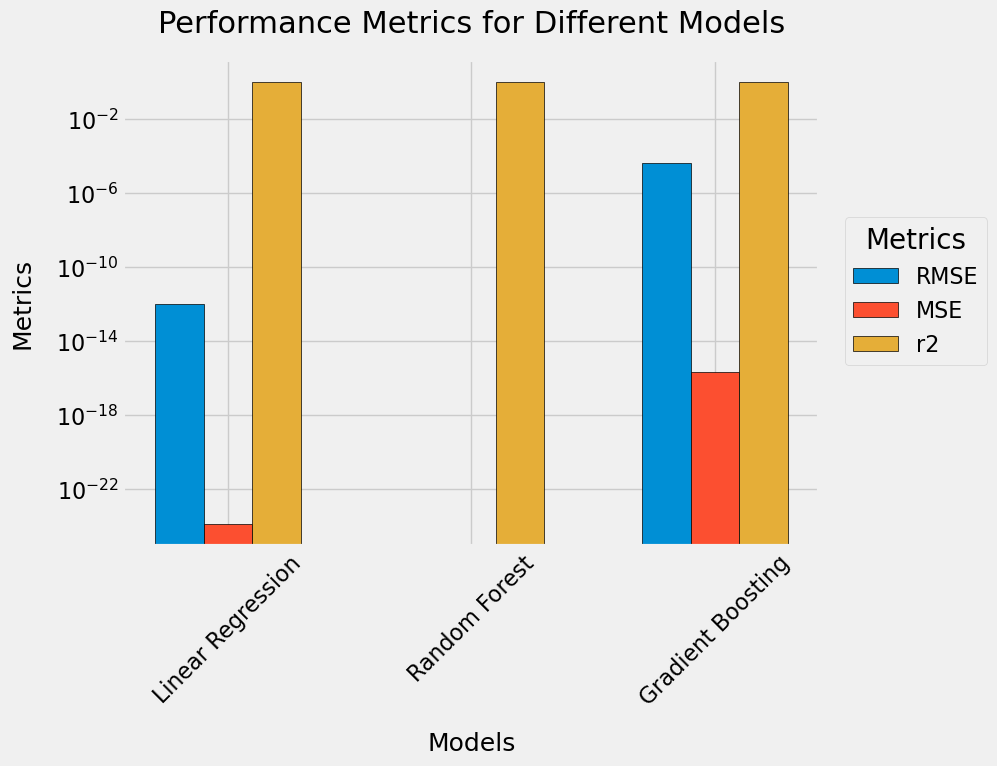

In [141]:
#create the dictionary of voting returns
data_dict = {"models": ["Linear Regression","Random Forest","Gradient Boosting"],
            "RMSE": rmse_values,
            "MSE": mse_values,
            "r2": r2_values}

#convert that into a dataframe
data_df = pd.DataFrame(data_dict)

#create the base axis
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (8,6))
#set the labels
#and the x positions
label = data_df["models"]
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              data_df["RMSE"],
              width = width, 
               label = "RMSE",
               edgecolor = "black")
#create the second bar using x
rect2 = ax.bar(x,
              data_df["MSE"],
              width = width,
              label = "MSE",
              edgecolor = "black")
#create the third bar plus 1 width
rects2 = ax.bar(x + width,
               data_df["r2"],
               width = width,
               label = "r2",
               edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("Metrics",
             fontsize = 18,
             labelpad = 16)
ax.set_xlabel("Models",
             fontsize = 18,
             labelpad =16)
ax.set_title("Performance Metrics for Different Models",
            fontsize = 22,
            pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Metrics",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45,
              labelsize = 16)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 16)
plt.yscale('log')

From the visualization, it can be observed that Random Forest consistently outperforms Linear Regression and Gradient Boosting in terms of RMSE and MSE. This indicates that Random Forest has the lowest overall error and provides the best accuracy in predicting the expected year of graduation.

While Linear Regression is the fastest model in terms of computation time, Random Forest stands out as the top-performing model. It achieves the highest accuracy and demonstrates superior predictive capabilities compared to both Linear Regression and Gradient Boosting.

Additionally, it is worth noting that Gradient Boosting, although slower than the other two models, still performs reasonably well but falls short in accuracy compared to Random Forest.

In conclusion, considering both accuracy and speed, Random Forest emerges as the optimal choice among the three models for predicting the expected year of graduation. It strikes a balance between performance and efficiency, offering highly accurate predictions while maintaining acceptable computational efficiency.

## **Thank You.**